# DATA_Preprocessing

In [4]:
# create a df from styles.csv neglecting lines with error
DATASET_PATH = '/disk1/data/fashion/'
styles = pd.read_csv(os.path.join(DATASET_PATH, "styles.csv"), error_bad_lines=False) 
# Get the list of names of images that are available
imgs_available = os.listdir(DATASET_PATH + '/resized')

# Check if each entry in styles.csv has a corresponding images listing. 
# If not, we remove it from the dataframe.
count=0
missing_img = []
for idx, line in styles.iterrows():
    if not os.path.exists(os.path.join(DATASET_PATH, 'resized', str(line.id)+'.jpg')):
        print(os.path.join(DATASET_PATH, 'resized', str(line.id)+'.jpg'))
        missing_img.append(idx)
        count=count+1
        
        
styles.drop(styles.index[missing_img], inplace=True)
print(count)

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

/disk1/data/fashion/resized/39403.jpg
/disk1/data/fashion/resized/39410.jpg
/disk1/data/fashion/resized/39401.jpg
/disk1/data/fashion/resized/39425.jpg
/disk1/data/fashion/resized/12347.jpg
5


In [5]:
print(styles.head())

subCategory = styles['subCategory']
masterCategory = styles['masterCategory']
articleType = styles['articleType']
id = styles['id']

masterCategory = masterCategory.to_frame()
subCategory = subCategory.to_frame()
articleType = articleType.to_frame()
id = id.to_frame()


y_ = masterCategory.join(subCategory)
y_ = y_.join(articleType)
y_ = id.join(y_)
print(y_.head())

      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt  
      id masterCategory subCategory  articleType
0  15970        Apparel     Topwear       Shirts
1  39386        Apparel  Bottom

In [6]:
y_.reset_index(inplace = True, drop=True)
print(y_)

          id masterCategory subCategory            articleType
0      15970        Apparel     Topwear                 Shirts
1      39386        Apparel  Bottomwear                  Jeans
2      59263    Accessories     Watches                Watches
3      21379        Apparel  Bottomwear            Track Pants
4      53759        Apparel     Topwear                Tshirts
...      ...            ...         ...                    ...
44414  17036       Footwear       Shoes           Casual Shoes
44415   6461       Footwear  Flip Flops             Flip Flops
44416  18842        Apparel     Topwear                Tshirts
44417  46694  Personal Care   Fragrance  Perfume and Body Mist
44418  51623    Accessories     Watches                Watches

[44419 rows x 4 columns]


In [7]:
y_ = y_[(y_.masterCategory != 'Home') & (y_.masterCategory != 'Free Items') & (y_.masterCategory != 'Personal Care')]
uniquie_article = y_['masterCategory'].unique()
print(uniquie_article)

['Apparel' 'Accessories' 'Footwear' 'Sporting Goods']


In [8]:
sorted_df = y_.groupby(['articleType']).size().sort_values(ascending=False)
top_classes = sorted_df.nsmallest(20)
display(top_classes)

articleType
Shoe Laces               1
Hair Accessory           1
Perfume and Body Mist    1
Rain Trousers            2
Ties and Cufflinks       2
Key chain                2
Trolley Bag              3
Hat                      3
Tablet Sleeve            3
Lounge Tshirts           3
Lehenga Choli            4
Robe                     4
Nehru Jackets            5
Shrug                    6
Umbrellas                6
Wristbands               7
Headband                 7
Salwar and Dupatta       7
Blazers                  8
Footballs                8
dtype: int64

In [9]:
y_ = y_[(y_.articleType != 'Shoe Laces') & (y_.articleType !='Perfume and Body Mist')  & (y_.articleType !='Hair Accessory')]

In [10]:
y_.reset_index(inplace = True, drop=True)
print(y_)

          id masterCategory subCategory   articleType
0      15970        Apparel     Topwear        Shirts
1      39386        Apparel  Bottomwear         Jeans
2      59263    Accessories     Watches       Watches
3      21379        Apparel  Bottomwear   Track Pants
4      53759        Apparel     Topwear       Tshirts
...      ...            ...         ...           ...
41902  42234        Apparel     Topwear          Tops
41903  17036       Footwear       Shoes  Casual Shoes
41904   6461       Footwear  Flip Flops    Flip Flops
41905  18842        Apparel     Topwear       Tshirts
41906  51623    Accessories     Watches       Watches

[41907 rows x 4 columns]


In [11]:
enc1 = y_['masterCategory']
enc1 = enc1.to_frame()

le = preprocessing.LabelEncoder()
le.fit(enc1)
le1 = le.transform(enc1)
le1 = pd.DataFrame(le1)

print(le1.head())
enc1.join(le1)

   0
0  1
1  1
2  0
3  1
4  1


/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,masterCategory,0
0,Apparel,1
1,Apparel,1
2,Accessories,0
3,Apparel,1
4,Apparel,1
...,...,...
41902,Apparel,1
41903,Footwear,2
41904,Footwear,2
41905,Apparel,1


In [12]:
enc2 = y_['subCategory']
enc2 = enc2.to_frame()

le = preprocessing.LabelEncoder()
le.fit(enc2)
le2 = le.transform(enc2)
le2 = pd.DataFrame(le2)
print(le2.head())
enc2.join(le2)

    0
0  25
1   4
2  28
3   4
4  25


/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,subCategory,0
0,Topwear,25
1,Bottomwear,4
2,Watches,28
3,Bottomwear,4
4,Topwear,25
...,...,...
41902,Topwear,25
41903,Shoes,19
41904,Flip Flops,8
41905,Topwear,25


In [13]:
enc3 = y_['articleType']
enc3 = enc3.to_frame()

le = preprocessing.LabelEncoder()
le.fit(enc3)
le3 = le.transform(enc3)
le3 = pd.DataFrame(le3)

print(le3.head())
enc1.join(le3)

     0
0   71
1   36
2  103
3   91
4   97


/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,masterCategory,0
0,Apparel,71
1,Apparel,36
2,Accessories,103
3,Apparel,91
4,Apparel,97
...,...,...
41902,Apparel,90
41903,Footwear,16
41904,Footwear,26
41905,Apparel,97


In [81]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(enc1)
w1=enc.transform(enc1).toarray()

<class 'numpy.ndarray'>
[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


In [79]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(enc2)
w2=enc.transform(enc2).toarray()

<class 'numpy.ndarray'>
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0.]]


In [23]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(enc3)
w3=enc.transform(enc3).toarray()

<class 'numpy.ndarray'>
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.

In [24]:
w_ = np.concatenate((w1, w2), axis=1)
print(len(w_))

41907


In [25]:
w_ = np.concatenate((w_, w3), axis=1)
w_.shape

(41907, 141)

In [27]:
w_ = pd.DataFrame(w_)
id_ = y_['id']
id_= pd.DataFrame(id_)
id_ = id_.join(w_)
id_.head()

,id,0,1,2,3,4,5,6,7,8,...,131,132,133,134,135,136,137,138,139,140
0,15970,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,39386,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,59263,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,21379,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,53759,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


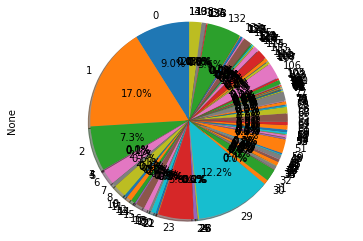

In [25]:
fig1, ax1 = plt.subplots()
id_.iloc[:,1:].sum(axis=0).plot.pie(autopct='%1.1f%%',shadow=True, startangle=90,ax=ax1)
ax1.axis("equal")
plt.show()

In [43]:
a=id_
a['id'] = a['id'].astype(np.str)
a.id = a.id.str.cat([".jpg"]*len(a))
print(a.head())
type(a.id[1])

          id    0    1    2    3    4    5    6    7    8  ...  131  132  133  \
0  15970.jpg  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  39386.jpg  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
2  59263.jpg  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  21379.jpg  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
4  53759.jpg  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0   

   134  135  136  137  138  139  140  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 142 columns]


str

In [ ]:
a.to_csv("/home/adm2/data/fashion/_id_.csv", index = False)